# Introduction
We will be using the dataset found at https://www.kaggle.com/annavictoria/speed-dating-experiment called Speed Dating Experiment from Columbia university. We will be focusing on the data that the participants filled out themselves and if their interests can predict wether or not they get a match.
We will put focus on Decision Trees, K-nearest naighbors and Support vector machines. This is because we thought they would yield the most interesting results. However we will also take a look at Naive Bayes, Neural networks and Logistic regression.

# Cleaning the Dataset

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.datasets import load_boston
from timeit import default_timer as timer

In [2]:
# Import all the data
data = pd.read_csv('speed_dating_data.csv',encoding="ISO-8859-1")
# Removes all data from waves 6-9 since there was a different rating system used in them.
columns = data.columns
ind = columns.get_loc("attr1_1")
my_data = data.iloc[:,:ind]
my_data = my_data.drop(columns=["position","positin1","order","partner","pid","int_corr","samerace","age_o","race_o","pf_o_att","pf_o_sin","pf_o_int","pf_o_fun","pf_o_amb","pf_o_sha","sinc_o","dec_o","attr_o","intel_o","fun_o",'amb_o',"shar_o","like_o","prob_o","met_o", "from", "undergra","field","career","expnum"])

def change_data_type(x):
    if str(type(x)) == "<class 'str'>":
        return float(str(x).replace(',',''))
    else:
        return 0

obj_col = ["tuition","mn_sat","zipcode","income"]
for obj in obj_col:
    my_data[[obj]] = my_data[obj].apply(change_data_type)
my_data

,iid,id,gender,idg,condtn,wave,round,match,age,field_cd,...,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy
0,1,1.0,0,1,1,1,10,0,21.0,1.0,...,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0
1,1,1.0,0,1,1,1,10,0,21.0,1.0,...,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0
2,1,1.0,0,1,1,1,10,1,21.0,1.0,...,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0
3,1,1.0,0,1,1,1,10,1,21.0,1.0,...,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0
4,1,1.0,0,1,1,1,10,1,21.0,1.0,...,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,1,44,2,21,22,0,25.0,18.0,...,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0,10.0
8374,552,22.0,1,44,2,21,22,0,25.0,18.0,...,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0,10.0
8375,552,22.0,1,44,2,21,22,0,25.0,18.0,...,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0,10.0
8376,552,22.0,1,44,2,21,22,0,25.0,18.0,...,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0,10.0


In [3]:
# Checking how many null values the data set contains.
columns = my_data.columns
for column in columns:
    count = my_data[column].isnull().values.sum()
    if count>0:
        print(column,": " ,count)

id :  1
age :  95
field_cd :  82
race :  63
imprace :  79
imprelig :  79
goal :  79
date :  97
go_out :  79
career_c :  138
sports :  79
tvsports :  79
exercise :  79
dining :  79
museums :  79
art :  79
hiking :  79
gaming :  79
clubbing :  79
reading :  79
tv :  79
theater :  79
movies :  79
concerts :  79
music :  79
shopping :  79
yoga :  79
exphappy :  101


We see that there are 79 people that dont fill in any information about them selfs. Since that data is an important part of our dataset we will need to drop them. We'll try first dropping anybody that has NaN in the "goal" column.

In [4]:
my_data = my_data.dropna(subset=['goal'])

In [5]:
columns = my_data.columns
for column in columns:
    count = my_data[column].isnull().values.sum()
    if count > 0:
        print(column,": " ,count)

id :  1
age :  32
field_cd :  19
date :  18
career_c :  59
exphappy :  22


Here we see that with only dropping the people that had NaN in the "goal" column we get rid of alot of NaN values. Meaning that the 79 people that didn't fill in their "goal" where the same people that didnt fill in alot of other information.

There are still 59 rows that are missing a value in carrer_c and since we have a value in that category that is "Other" we decided to set all the rows missing values in "career_c" column to 15 which is the numeric representation of "Other". Same story with field_cd, so we set it all as "Other" that has the numeric representation of 18.

In [6]:
my_data["career_c"].fillna(15,inplace=True)
my_data["field_cd"].fillna(18,inplace=True)


c:\users\notandi\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [7]:
columns = my_data.columns
for column in columns:
    count = my_data[column].isnull().values.sum()
    if count > 0:
        print(column,": " ,count)

id :  1
age :  32
date :  18
exphappy :  22


In [8]:
my_data[my_data["id"].isnull()]

,iid,id,gender,idg,condtn,wave,round,match,age,field_cd,...,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy
8377,552,NaN,1,44,2,21,22,0,25.0,18.0,...,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0,10.0


We see that the iid for the person with an id value of NaN is 552. Lets find the id for that person during wave 21.

In [9]:
my_data.loc[my_data['iid'] == 552 ]

,iid,id,gender,idg,condtn,wave,round,match,age,field_cd,...,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy
8356,552,22.0,1,44,2,21,22,1,25.0,18.0,...,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0,10.0
8357,552,22.0,1,44,2,21,22,1,25.0,18.0,...,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0,10.0
8358,552,22.0,1,44,2,21,22,0,25.0,18.0,...,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0,10.0
8359,552,22.0,1,44,2,21,22,0,25.0,18.0,...,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0,10.0
8360,552,22.0,1,44,2,21,22,1,25.0,18.0,...,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0,10.0
8361,552,22.0,1,44,2,21,22,0,25.0,18.0,...,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0,10.0
8362,552,22.0,1,44,2,21,22,1,25.0,18.0,...,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0,10.0
8363,552,22.0,1,44,2,21,22,1,25.0,18.0,...,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0,10.0
8364,552,22.0,1,44,2,21,22,0,25.0,18.0,...,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0,10.0
8365,552,22.0,1,44,2,21,22,0,25.0,18.0,...,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0,10.0


Here we see that the person with iid 552 has the id 22.0 for wave 21, so we can fill the NaN value with 22.0.

In [10]:
my_data["id"].fillna(22.0,inplace=True)

c:\users\notandi\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


For the remaining NaN values we will drop their rows.

In [11]:
columns = my_data.columns
for column in columns:
    count = my_data[column].isnull().values.sum()
    if count > 0:
        print(column,": " ,count)

age :  32
date :  18
exphappy :  22


In [12]:
my_data = my_data.dropna()

Done cleaning the data! Now we can export it and get to training.

# Model Comparison
Lets start testing our dataset with different models. We create a test set of size 0.2 and train of size 0.8. 
We scale the dataset using standard scale from sklearn and from there we can move on to examine different accuracy score!

In [13]:
# TESTING MODELS STARTS HERE
y = my_data["match"]
X = my_data.drop(columns="match")

X_train, X_test, y_train, y_test = train_test_split( 
             X, y, test_size = 0.2, train_size=0.8) 

# # Scaling
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X_train)

# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)
# ##

## Decision Trees
Decision trees are one of the simplest supervised learning models. They can be used to identify dimensions, handle missing values and deal with outliers. 

In [14]:
X = my_data.drop( columns='match')
y = my_data['match']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, train_size=0.8)

dtc = DecisionTreeClassifier(class_weight = "balanced")
dtc.fit(X_train, y_train)

print('Training accuracy: ' + str(dtc.score(X_train, y_train)))
print('Validation accuracy: ' + str(dtc.score(X_test, y_test)))

# making predictions on the testing set 
y_pred = dtc.predict(X_test) 

# lets look at the confusion matrix
print(confusion_matrix(y_test, y_pred))

# lets make a report
print(classification_report(y_test, y_pred))

Training accuracy: 0.665858463403546
Validation accuracy: 0.5933333333333334
[[809 570]
 [101 170]]
              precision    recall  f1-score   support

           0       0.89      0.59      0.71      1379
           1       0.23      0.63      0.34       271

    accuracy                           0.59      1650
   macro avg       0.56      0.61      0.52      1650
weighted avg       0.78      0.59      0.65      1650



This is the accuracy score for the training and validation accuracy. This could be better, so lets look at how different min sample splits can affect the accuracy scores.

In [15]:
# Function to help us measure the accuracy scores for different min sample splits
def min_split(min_split):
    t_scores = []
    v_scores = []
    dt = DecisionTreeClassifier(min_samples_split=min_split, class_weight = "balanced")
    dt.fit(X_train, y_train)
    #t_score = dt.score(X_train, y_train)
    t_score = dt.score(X_train, y_train)
    v_score = dt.score(X_test, y_test)
    if t_score > v_score:
        diff = t_score - v_score
    else:
        diff = 1
    sum_score = t_score + v_score
    y_pred = dtc.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    length = abs((1-diff)+sum_score)


    
    print('Statistics for model with min split of:', min_split)
    print('Training accuracy score:', t_score)
    print('Validation accuracy score:', v_score)
    print('Difference in accuracy scores:', diff)
    print('Confusion Matrix: \n' + str(cm) + "\n")
    return {'min_split':min_split, 't_score': t_score, 'v_score': v_score, 'length': length}

Here we create a function that can plot our decision tree for us. 

In [16]:
# Function to make a plot to visualize the scores
def plot_df(eff, df):
    plt.title('min split effect on accuracy')
    plt.xlabel('min split')
    plt.ylabel('Accuracy')
    train=plt.plot(eff, df.t_score, color='g', label='Training accuracy') 
    val=plt.plot(eff, df.v_score, color='r', label='Validation accuracy')
    plt.legend(loc = 'upper left')
    plt.show()

Now lets call our functions and compare how different min sample split can affect our accuracy. 
Min sample split is the minumum samples the Decision Tree has to look at before deciding splitting factor in node. This can be tuned accordingly. 

In [17]:
# Sample min split
min_splits = [5, 10, 25, 30, 50, 60, 75, 100, 110, 120, 130, 140, 150, 160, 180, 200, 210, 220, 250, 300, 350, 400, 500]
# Empty array where our result about arrays go 
min_split_data = []

for i in min_splits:
    # Estimating min split and appending to our min split data array
    min_split_data.append(min_split(i))
    
# List of dictionaries that we can then plot
min_split_df = pd.DataFrame(min_split_data)

Statistics for model with min split of: 5
Training accuracy score: 0.665858463403546
Validation accuracy score: 0.5933333333333334
Difference in accuracy scores: 0.07252513007021266
Confusion Matrix: 
[[809 570]
 [101 170]]

Statistics for model with min split of: 10
Training accuracy score: 0.665858463403546
Validation accuracy score: 0.5933333333333334
Difference in accuracy scores: 0.07252513007021266
Confusion Matrix: 
[[809 570]
 [101 170]]

Statistics for model with min split of: 25
Training accuracy score: 0.661009243824822
Validation accuracy score: 0.5890909090909091
Difference in accuracy scores: 0.07191833473391285
Confusion Matrix: 
[[809 570]
 [101 170]]

Statistics for model with min split of: 30
Training accuracy score: 0.6591907864828004
Validation accuracy score: 0.5951515151515151
Difference in accuracy scores: 0.06403927133128529
Confusion Matrix: 
[[809 570]
 [101 170]]

Statistics for model with min split of: 50
Training accuracy score: 0.6681315350810729
Validatio

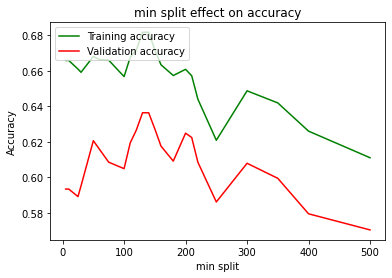

In [18]:
# We plot our results from min split test we did above
plot_df(min_split_df.min_split, min_split_df)

Lets get the index of the min split that had the lowest difference between training and testing score while still having a high accuracy score.

In [19]:
min_split_ind = min_split_df.idxmax()['length']
print('Index of prefered min split is: ', min_split_df.idxmax()['length'])
pref_min_split = min_splits[min_split_ind]
print('Prefered min split is:', pref_min_split)

Index of prefered min split is:  10
Prefered min split is: 130


In [20]:
dtc = DecisionTreeClassifier(min_samples_split=pref_min_split, class_weight = "balanced")
dtc.fit(X_train, y_train)

print('Training accuracy: ' + str(dtc.score(X_train, y_train)))
print('Validation accuracy: ' + str(dtc.score(X_test, y_test)) + "\n")

# making predictions on the testing set 
y_pred = dtc.predict(X_test) 

# lets look at the confusion matrix
print(confusion_matrix(y_test, y_pred))

# lets make a report
print(classification_report(y_test, y_pred))

Training accuracy: 0.6817699651462342
Validation accuracy: 0.6363636363636364

[[896 483]
 [117 154]]
              precision    recall  f1-score   support

           0       0.88      0.65      0.75      1379
           1       0.24      0.57      0.34       271

    accuracy                           0.64      1650
   macro avg       0.56      0.61      0.54      1650
weighted avg       0.78      0.64      0.68      1650



Now we can see that this has proven better results for accuracy.
We have bumped the accuracy of our model up to to 64%. 
Now our model accuracy for correctly identifying "not a match" is now at 57% and identifying "a match" is now 65%.

## K- Nearest Neighbor
We fit the dataset and test when k = 1 to find accuracy score. We create a confusion matrix and create a classification report to use as bases for our examination of k nearest neighbor. 

In [21]:
# HERE WE ARE TESTING WITH K = 1
y = my_data["match"]
X = my_data.drop(columns="match")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size=0.8) 


knn = KNeighborsClassifier(n_neighbors=1, weights="distance")
knn.fit(X_train, y_train.values.ravel()) 

print('Training accuracy: ', knn.score(X_train, y_train)*100)
print('Validation accuracy: ', knn.score(X_test, y_test)*100)

# making predictions on the testing set 
y_pred = knn.predict(X_test)

# lets look at the confusion matrix
print(confusion_matrix(y_test, y_pred))

# lets make a report
print(classification_report(y_test, y_pred))


Training accuracy:  78.57251098651311
Validation accuracy:  75.27272727272727
[[1184  191]
 [ 217   58]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1375
           1       0.23      0.21      0.22       275

    accuracy                           0.75      1650
   macro avg       0.54      0.54      0.54      1650
weighted avg       0.74      0.75      0.75      1650



KNN doesn't always perform as well with high-dimensionality or categorical features.But our model did predict 75%. 
Meaning it can predict that you did not get a match by 86%, and 21% if you got a match. 

In [22]:
# Function to make a plot to visualize the scores
def plot_df(neighbors, test_accuracy, train_accuracy):
    plt.title('Effect on accuracy')
    plt.xlabel('n_neighbors')
    plt.ylabel('Accuracy')
    
    plt.plot(neighbors, test_accuracy, color='g', label='Testing dataset Accuracy') 
    plt.plot(neighbors, train_accuracy, color='r', label='Training dataset Accuracy')
    
    plt.legend(loc = 'upper left')
    plt.show()

Lets look at a bigger range for k. Here we will compare k on the range 1 - 1000. 

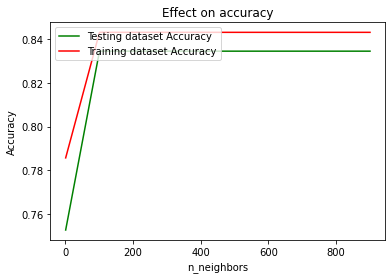

In [23]:
neighbors = np.arange(1, 1000, 100) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 

# Loop over K values 
for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k, weights="distance") 
    knn.fit(X_train, y_train.values.ravel()) 
      
    # Compute traning and test data accuracy 
    train_accuracy[i] = knn.score(X_train, y_train.values.ravel()) 
    test_accuracy[i] = knn.score(X_test, y_test.values.ravel()) 
    
# Generate plot 
plot_df(neighbors, test_accuracy, train_accuracy)


We can see that accuracy does not change a lot after k is larger than 100. Before we examine that data sample further, lets also look at error rates. 

In [24]:
error = []

# Calculating error for K values between 1 and 1000
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i, weights="distance")
    knn.fit(X_train, y_train.values.ravel())
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test.values.ravel()))

Text(0, 0.5, 'Mean Error')

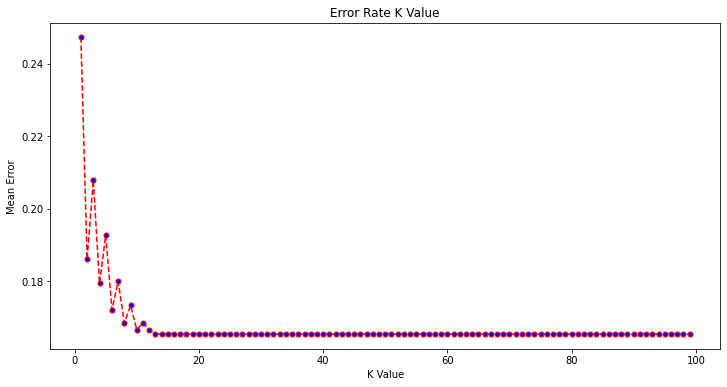

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=5)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Error rate seems to be relatively low for k > 10.

Lets look at k at range 1 - 100.

0.011945427911483342
0.010127521617141255
0.008612599705189461
0.008612599705189461
0.008612599705189461
0.008612599705189461
0.008612599705189461
0.008612599705189461
0.008612599705189461
0.008612599705189461
0.008612599705189461
0.008612599705189461
0.008612599705189461
0.008612599705189461
0.008612599705189461
0.008612599705189461
0.008612599705189461
0.008612599705189461
0.008612599705189461
96


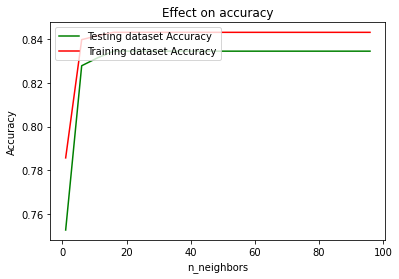

In [26]:
neighbors = np.arange(1, 100, 5) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 
best_k = 0
acc = 1
# Loop over K values 
for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k, weights="distance") 
    knn.fit(X_train, y_train.values.ravel()) 
    # Compute traning and test data accuracy 
    train_accuracy[i] = knn.score(X_train, y_train.values.ravel()) 
    test_accuracy[i] = knn.score(X_test, y_test.values.ravel()) 
    if best_k == 0:
        best_k = k
    elif ((1 - (test_accuracy[i] - train_accuracy[i]) + (train_accuracy[i] + test_accuracy[i])) > acc):
        best_k = k
        print(abs(test_accuracy[i] - train_accuracy[i]))
        acc = 1 - abs(test_accuracy[i] - train_accuracy[i]) + (train_accuracy[i] + test_accuracy[i])
print(best_k)  
# Generate plot 
plot_df(neighbors, test_accuracy, train_accuracy)

In [27]:
# HERE WE ARE TESTING WITH BEST K
knn = KNeighborsClassifier(n_neighbors=best_k, weights="distance")
knn.fit(X_train, y_train.values.ravel()) 

print("K-nearest where k is " + str(best_k) + " \nTest accuracy score:")
print(knn.score(X_test, y_test)*100)

# making predictions on the testing set 
y_pred = knn.predict(X_test) 

# lets look at the confusion matrix
print(confusion_matrix(y_test, y_pred))

# lets make a report
print(classification_report(y_test, y_pred))

K-nearest where k is 96 
Test accuracy score:
83.45454545454545
[[1360   15]
 [ 258   17]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1375
           1       0.53      0.06      0.11       275

    accuracy                           0.83      1650
   macro avg       0.69      0.53      0.51      1650
weighted avg       0.79      0.83      0.78      1650



As assumed we have bumped the accuracy up to 83%. 
Accuracy for "not a match" is at 99% but accuracy for "a match" is at 6%. This means the best k classified everything as"not a match".

In conclusion as we looked at different k values, it did add to our accuracy score but because we have such a simple confusion matrix, and because of the nature of the data tested, we can see that the initial k=1 did leave us with the best results in the end. When we have rare occurances like a boolean "a match", KNN might not the best choice.

## Naive Bayes Algorithm
Naive Bayes algorithms is very efficient, require a relatively small number of training data and assume that there’s no correlation between features. This proves very helpful when focus is on relatively short running time. 

Gaussi Naive Bayes algorithms assumes that values in each class are normal distributed. 

In [28]:
# training the model on training set 
y = my_data["match"]
X = my_data.drop(columns="match")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size=0.8) 


from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, y_train.values.ravel()) 

# making predictions on the testing set 
y_pred = gnb.predict(X_test) 

print("Gaussian Naive Bayes, Accuracy score:")
print(accuracy_score(y_test, y_pred)*100)

print("Class priority: ", gnb.class_prior_)

# lets look at the confusion matrix
print(confusion_matrix(y_test, y_pred))

# lets make a report
print(classification_report(y_test, y_pred))

Gaussian Naive Bayes, Accuracy score:
82.84848484848484
Class priority:  [0.83649038 0.16350962]
[[1366    3]
 [ 280    1]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1369
           1       0.25      0.00      0.01       281

    accuracy                           0.83      1650
   macro avg       0.54      0.50      0.46      1650
weighted avg       0.73      0.83      0.75      1650



This shows us that Gussian Naive Bayes is perfoming very similarly to K-nearest. However K-nearest has a bit higher accuracy score and better results in confusion matrix. 

## Support Vector Machines
SVM is a supervised machine learning algorithm which can be used for classification or regression problems. Since we are trying to classify between whether or not a person will get a match, that is between "0"(no match) and "1"(match) we will be using it for classification. We are going to be using the Support Vector Classifier(SVC) from sklearn and we'll be trying out different parameters in the SVC creation.

In [29]:
def test_different_param(c,x,X_train,y_train, X_test, y_test):        
        svc = SVC(kernel=x, C=c, class_weight='balanced')
        svc.fit(X_train, y_train)
        
        # Accuracy score of training data
        training = svc.score(X_train, y_train)
        
        # Accuracy score of test data
        test = svc.score(X_test, y_test)
        print("SVC with kernal =",x, " C =",c)
        print('Training data accuracy: ', training)
        print("Testing data accuracy: ", test)
        
        # Predicting the y for the test set.
        y_pred = svc.predict(X_test)
        
        # Getting the classification report
        print(classification_report(y_pred,y_test,zero_division=0))
        print("-------------------------------------------------------\n")
        return {"v_score":test,"t_score":training, "kernal":x,"c":c}

In [30]:
X = my_data.drop( columns='match')
y = my_data['match']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, train_size=0.8)

test_c = [10,20,30,40,50,60,70,80,90,100]
methods = ['poly','rbf','sigmoid']
acc_scores_poly = []
acc_scores_rbf = []
acc_scores_sigmoid = []
for c in test_c:
    acc = test_different_param(c,"poly",X_train,y_train,X_test,y_test)
    acc_scores_poly.append(acc)
    acc_df_poly = pd.DataFrame(acc_scores_poly)
    
for c in test_c:
    acc = test_different_param(c,"rbf",X_train,y_train,X_test,y_test)
    acc_scores_rbf.append(acc)
    acc_df_rbf = pd.DataFrame(acc_scores_rbf)
    
for c in test_c:
    acc = test_different_param(c,"sigmoid",X_train,y_train,X_test,y_test)
    acc_scores_sigmoid.append(acc)
    acc_df_sigmoid = pd.DataFrame(acc_scores_sigmoid)

SVC with kernal = poly  C = 10
Training data accuracy:  0.8328534626458555
Testing data accuracy:  0.8369696969696969
              precision    recall  f1-score   support

           0       1.00      0.84      0.91      1649
           1       0.00      0.00      0.00         1

    accuracy                           0.84      1650
   macro avg       0.50      0.42      0.46      1650
weighted avg       1.00      0.84      0.91      1650

-------------------------------------------------------

SVC with kernal = poly  C = 20
Training data accuracy:  0.8328534626458555
Testing data accuracy:  0.8369696969696969
              precision    recall  f1-score   support

           0       1.00      0.84      0.91      1649
           1       0.00      0.00      0.00         1

    accuracy                           0.84      1650
   macro avg       0.50      0.42      0.46      1650
weighted avg       1.00      0.84      0.91      1650

-----------------------------------------------------

SVC with kernal = rbf  C = 80
Training data accuracy:  0.5015911501742688
Testing data accuracy:  0.4993939393939394
              precision    recall  f1-score   support

           0       0.50      0.83      0.63       838
           1       0.47      0.16      0.24       812

    accuracy                           0.50      1650
   macro avg       0.49      0.49      0.43      1650
weighted avg       0.49      0.50      0.43      1650

-------------------------------------------------------

SVC with kernal = rbf  C = 90
Training data accuracy:  0.4996211547204122
Testing data accuracy:  0.49636363636363634
              precision    recall  f1-score   support

           0       0.50      0.83      0.62       831
           1       0.48      0.16      0.24       819

    accuracy                           0.50      1650
   macro avg       0.49      0.49      0.43      1650
weighted avg       0.49      0.50      0.43      1650

------------------------------------------------------

In [31]:
def plot_df(df,title):
    train=plt.plot(df.c,df.t_score, color='g', label='Training accuracy') 
    val=plt.plot(df.c,df.v_score, color='r', label='Testing accuracy')
    plt.legend(loc = 'upper left')
    plt.xlabel("C")
    plt.ylabel("Accuracy")
    plt.title(title)
    plt.show()

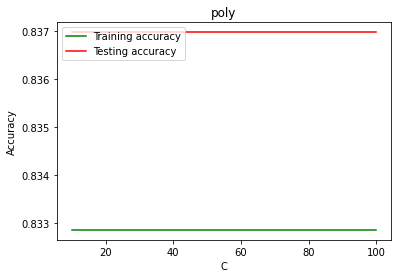

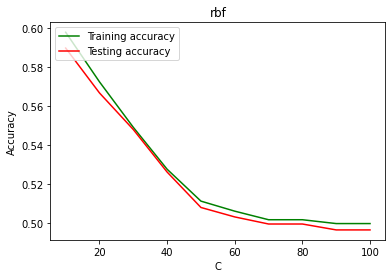

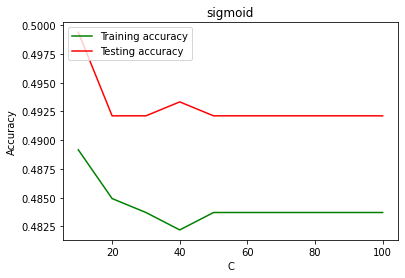

In [32]:
plot_df(acc_df_poly,"poly")
plot_df(acc_df_rbf,"rbf")
plot_df(acc_df_sigmoid,"sigmoid")

The C value is a regularization parameter for the Support Vector Classifier(SVC), we trying training the SVC using C values ranging from 10.0 to 100.0. We also looked at using different kernal functions in the training. In the graphs above we can see the different kernal functions and how the accuracy score was when using them with the different C values.

It is clear when looking at the graph for the results of using the kernel function <i>"poly"</i> that we get very poor accuracy using that no matter what the C value is. Therefore that is not a good kernel function for this data. The same goes for the kernel function <i>"sigmoid"</i> even though the accuracy is alot better than with the <i>"poly"</i> function it is not as good as when using the <i>"rbg"</i> kernel function.

We can see from the graph that the <i>"rbg"</i> function performs best when C is lower than 20. So lets look at a few confusion matices when using the <b>rbf</b> kernel function and <b>C</b> is <b>smaller</b> than <b>20</b> 

Accuracy score for C = 1 
 0.573939393939394 

Accuracy score for C = 2 
 0.636969696969697 

Accuracy score for C = 3 
 0.6321212121212121 

Accuracy score for C = 4 
 0.6321212121212121 

Accuracy score for C = 5 
 0.6321212121212121 

Accuracy score for C = 6 
 0.6327272727272727 

Accuracy score for C = 7 
 0.6327272727272727 

Accuracy score for C = 8 
 0.6290909090909091 

Accuracy score for C = 9 
 0.6236363636363637 

Accuracy score for C = 10 
 0.6218181818181818 

Accuracy score for C = 11 
 0.6175757575757576 

Accuracy score for C = 12 
 0.6157575757575757 

Accuracy score for C = 13 
 0.6139393939393939 

Accuracy score for C = 14 
 0.6139393939393939 

Accuracy score for C = 15 
 0.6115151515151516 

Accuracy score for C = 16 
 0.6090909090909091 

Accuracy score for C = 17 
 0.6054545454545455 

Accuracy score for C = 18 
 0.6036363636363636 

Accuracy score for C = 19 
 0.6036363636363636 

Accuracy score for C = 20 
 0.6012121212121212 

Confusion Matrix for C = 2
    

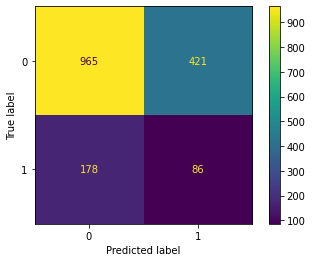

In [36]:
best_c = [0,0]
for x in range(1,21):
    svc = SVC(kernel="rbf", C=x, class_weight='balanced')
    svc.fit(X_train, y_train)
    acc = svc.score(X_test,y_test)
    print("Accuracy score for C =",x,"\n",acc,"\n")
    if acc>best_c[1]:
        best_c[0]=x
        best_c[1]=acc

print("Confusion Matrix for C =", best_c[0])
svc = SVC(kernel="rbf", C=best_c[0], class_weight='balanced')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(classification_report(y_pred,y_test,zero_division=0))
plot_confusion_matrix(svc, X_test, y_test)
plt.show()

Here we see that the best accuracy is when <b>C=2</b>. Accuracy for "0"(no match) is at 84% but accuracy for "1"(match) is at 17% with an overall accuracy of 64%. 

## Neural Networks

"The process of creating a neural network begins with the perceptron. In simple terms, the perceptron receives inputs, multiplies them by some weights, and then passes them into an activation function (such as logistic, relu, tanh, identity) to produce an output.
Neural networks are created by adding the layers of these perceptrons together, known as a multi-layer perceptron model. There are three layers of a neural network - the input, hidden, and output layers. The input layer directly receives the data, whereas the output layer creates the required output. The layers in between are known as hidden layers where the intermediate computation takes place.
A neural network algorithm can be used for both classification and regression problems." 
https://www.pluralsight.com/guides/machine-learning-neural-networks-scikit-learn

We will be using it for binary classification. Hopefully making it able to predict wether a person will get a match or not based on their interests.

Max iterations  100
First Network
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.85      0.92      1650
           1       0.00      0.00      0.00         0

    accuracy                           0.85      1650
   macro avg       0.50      0.42      0.46      1650
weighted avg       1.00      0.85      0.92      1650


Confusion Matrix:



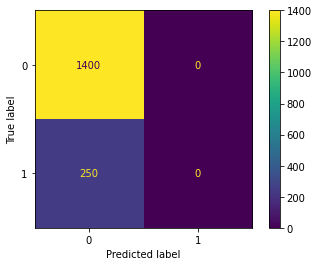

Second Network
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.85      0.92      1650
           1       0.00      0.00      0.00         0

    accuracy                           0.85      1650
   macro avg       0.50      0.42      0.46      1650
weighted avg       1.00      0.85      0.92      1650


Confusion Matrix:



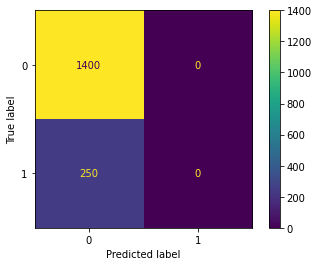

Third Network
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.85      0.92      1650
           1       0.00      0.00      0.00         0

    accuracy                           0.85      1650
   macro avg       0.50      0.42      0.46      1650
weighted avg       1.00      0.85      0.92      1650


Confusion Matrix:



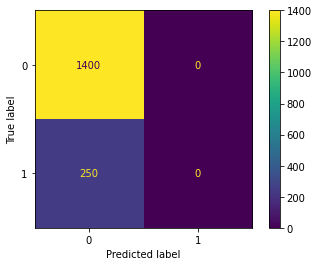

Max iterations  200
First Network
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      1367
           1       0.25      0.22      0.24       283

    accuracy                           0.75      1650
   macro avg       0.55      0.54      0.54      1650
weighted avg       0.74      0.75      0.75      1650


Confusion Matrix:



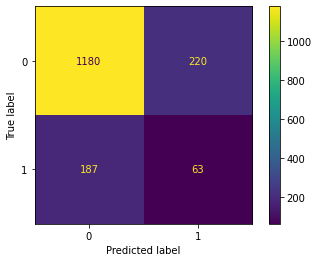

Second Network
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.85      0.92      1645
           1       0.02      0.80      0.03         5

    accuracy                           0.85      1650
   macro avg       0.51      0.83      0.48      1650
weighted avg       1.00      0.85      0.92      1650


Confusion Matrix:



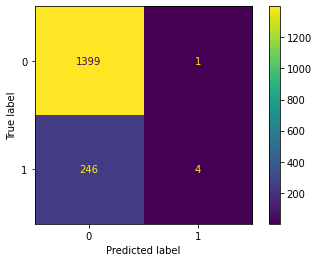

Third Network
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.85      0.92      1645
           1       0.02      0.80      0.03         5

    accuracy                           0.85      1650
   macro avg       0.51      0.83      0.48      1650
weighted avg       1.00      0.85      0.92      1650


Confusion Matrix:



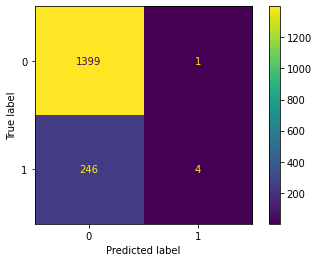

Max iterations  500
First Network
Classification Report: 
               precision    recall  f1-score   support

           0       0.47      0.86      0.60       761
           1       0.57      0.16      0.25       889

    accuracy                           0.48      1650
   macro avg       0.52      0.51      0.43      1650
weighted avg       0.52      0.48      0.41      1650


Confusion Matrix:



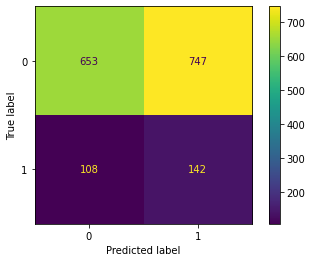

Second Network
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.85      0.92      1643
           1       0.00      0.00      0.00         7

    accuracy                           0.84      1650
   macro avg       0.50      0.42      0.46      1650
weighted avg       0.99      0.84      0.91      1650


Confusion Matrix:



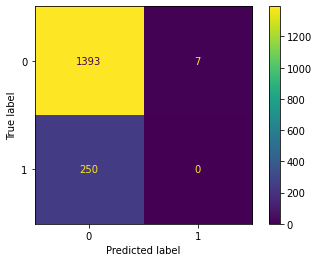

Third Network
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.85      0.92      1650
           1       0.00      0.00      0.00         0

    accuracy                           0.85      1650
   macro avg       0.50      0.42      0.46      1650
weighted avg       1.00      0.85      0.92      1650


Confusion Matrix:



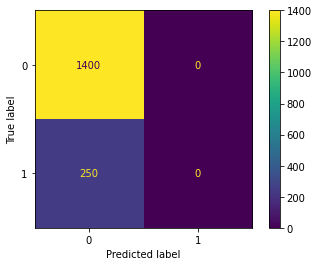

Max iterations  1000
First Network
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.86      0.84      1364
           1       0.21      0.19      0.20       286

    accuracy                           0.74      1650
   macro avg       0.52      0.52      0.52      1650
weighted avg       0.73      0.74      0.73      1650


Confusion Matrix:



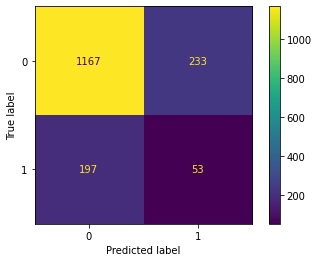

Second Network
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.85      0.92      1650
           1       0.00      0.00      0.00         0

    accuracy                           0.85      1650
   macro avg       0.50      0.42      0.46      1650
weighted avg       1.00      0.85      0.92      1650


Confusion Matrix:



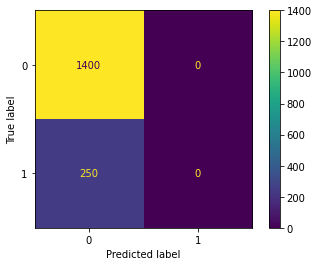

Third Network
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.85      0.92      1645
           1       0.02      0.80      0.03         5

    accuracy                           0.85      1650
   macro avg       0.51      0.83      0.48      1650
weighted avg       1.00      0.85      0.92      1650


Confusion Matrix:



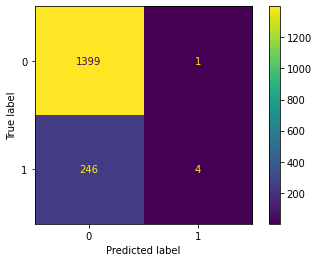

Max iterations  2000
First Network
Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.86      0.67       894
           1       0.50      0.16      0.25       756

    accuracy                           0.54      1650
   macro avg       0.52      0.51      0.46      1650
weighted avg       0.52      0.54      0.48      1650


Confusion Matrix:



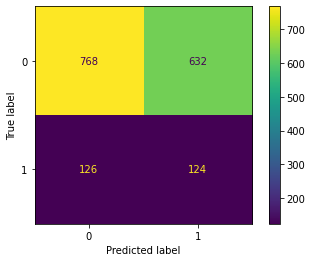

Second Network
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.85      0.92      1648
           1       0.01      1.00      0.02         2

    accuracy                           0.85      1650
   macro avg       0.50      0.92      0.47      1650
weighted avg       1.00      0.85      0.92      1650


Confusion Matrix:



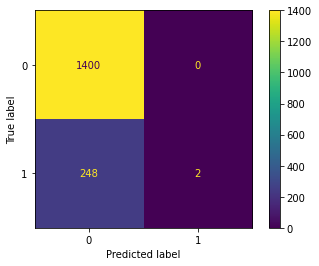

Third Network
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.85      0.92      1650
           1       0.00      0.00      0.00         0

    accuracy                           0.85      1650
   macro avg       0.50      0.42      0.46      1650
weighted avg       1.00      0.85      0.92      1650


Confusion Matrix:



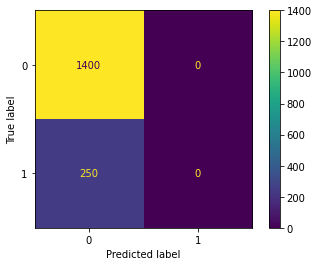

Max iterations  3000
First Network
Classification Report: 
               precision    recall  f1-score   support

           0       0.20      0.86      0.33       332
           1       0.81      0.15      0.26      1318

    accuracy                           0.29      1650
   macro avg       0.51      0.50      0.29      1650
weighted avg       0.69      0.29      0.27      1650


Confusion Matrix:



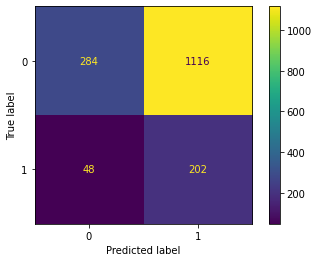

Second Network
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.85      0.92      1645
           1       0.02      0.80      0.03         5

    accuracy                           0.85      1650
   macro avg       0.51      0.83      0.48      1650
weighted avg       1.00      0.85      0.92      1650


Confusion Matrix:



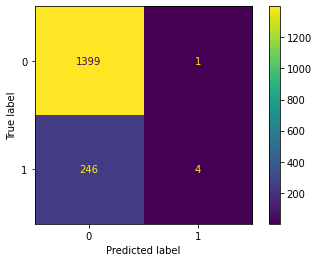

Third Network
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.85      0.92      1650
           1       0.00      0.00      0.00         0

    accuracy                           0.85      1650
   macro avg       0.50      0.42      0.46      1650
weighted avg       1.00      0.85      0.92      1650


Confusion Matrix:



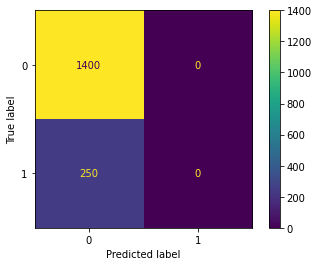

Max iterations  4000
First Network
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.85      0.92      1645
           1       0.02      0.80      0.03         5

    accuracy                           0.85      1650
   macro avg       0.51      0.83      0.48      1650
weighted avg       1.00      0.85      0.92      1650


Confusion Matrix:



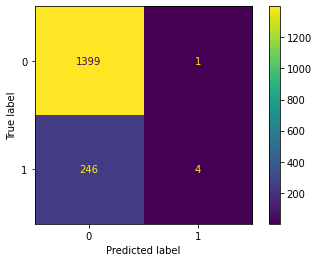

Second Network
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.85      0.92      1650
           1       0.00      0.00      0.00         0

    accuracy                           0.85      1650
   macro avg       0.50      0.42      0.46      1650
weighted avg       1.00      0.85      0.92      1650


Confusion Matrix:



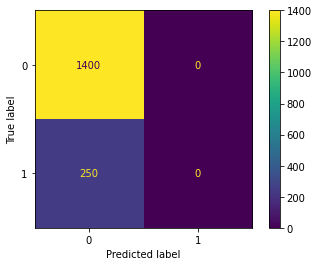

Third Network
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.85      0.92      1645
           1       0.02      0.80      0.03         5

    accuracy                           0.85      1650
   macro avg       0.51      0.83      0.48      1650
weighted avg       1.00      0.85      0.92      1650


Confusion Matrix:



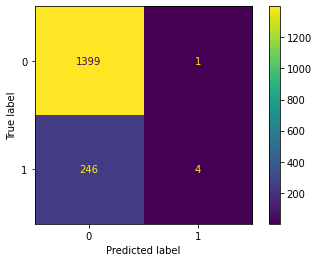

In [34]:
mx = [100,200,500,1000,2000 ,3000,4000 ]
y = my_data["match"]
X = my_data.drop(columns="match")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size=0.8) 

for x in mx:
    print("Max iterations ", x)
    mlpc = MLPClassifier()
    mlpc.fit(X_train, y_train)
    y_pred = mlpc.predict(X_test)
    print("First Network\nClassification Report: \n",classification_report(y_pred,y_test,zero_division=0))
    print("\nConfusion Matrix:\n")
    plot_confusion_matrix(mlpc, X_test, y_test)
    plt.show()

    mlpc2 = MLPClassifier(max_iter=x, activation='tanh', hidden_layer_sizes=(10, 2),solver="adam")
    mlpc2.fit(X_train, y_train)
    y_pred2 = mlpc2.predict(X_test)
    print('Second Network\nClassification Report: \n', classification_report(y_pred2,y_test,zero_division=0))
    print("\nConfusion Matrix:\n")
    plot_confusion_matrix(mlpc2, X_test, y_test)
    plt.show()
    
    # Third Network
    mlpc3 = MLPClassifier(max_iter=x, activation='tanh', hidden_layer_sizes=(11, 1),solver="adam")
    mlpc3.fit(X_train, y_train)
    y_pred3 = mlpc3.predict(X_test)
    print("Third Network\nClassification Report: \n",classification_report(y_pred3,y_test,zero_division=0))
    print("\nConfusion Matrix:\n")
    plot_confusion_matrix(mlpc3, X_test, y_test)
    plt.show()


With these outcomes we can see that neural networks don't seem to work well with unbalanced datasets like this one. There are no senarios that have good results, the neural networks seem to be overfitting either towards a "1"(match) or a "0"(no match)

## Logistic Regression
As stated on wikipedia: Binary logistic regression is used to predict the odds of being a case based on the values of the independent variables (predictors). The odds are defined as the probability that a particular outcome is a case divided by the probability that it is a noninstance.
https://en.wikipedia.org/wiki/Logistic_regression

Make a logistic regression model and fit the data. For a logistic regression model used on this size and type of data there no uning to the parameters that will affect the score. Lets go ahead and see what results the logistic regression model gives us.

Training Accuracy: 0.8339142294287013
Validation Accuracy: 0.84


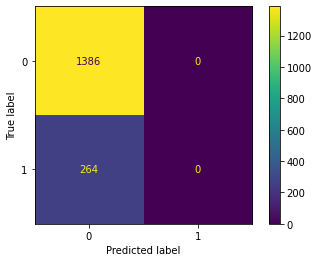

In [35]:
y = my_data["match"]
X = my_data.drop(columns="match")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size=0.8) 

model = LogisticRegression(C=1, random_state=42)

lrc = model.fit(X_train, y_train)

predict_train_lrc = lrc.predict(X_train)
predict_test_lrc = lrc.predict(X_test)

print('Training Accuracy:', accuracy_score(y_train, predict_train_lrc))
print('Validation Accuracy:', accuracy_score(y_test, predict_test_lrc))

plot_confusion_matrix(lrc, X_test, y_test)

plt.show()

The plot shows us that even though the accuracy score is high in both training and valuation that the condusion matrix does not give good accurate results.

# Conclusion:
When looking at the results for all the models we tried, it became clear that our data was very unbalanced and that presented some issues. We saw the most equal procentages in accurate predictions when using <b>decision trees</b> even if the overall accuracy score was better for the <i>KNN</i> classifier. We would choose to use <b>decision trees</b> for this data 